In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import shutil
import matplotlib
from matplotlib import pyplot as plt

In [4]:
# combine the two folders
# Source folders
part1 = "/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1"
part2 = "/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2"

# Destination folder
combined_folder = "/kaggle/working/HAM10000_images"
os.makedirs(combined_folder, exist_ok=True)

# Function to copy files
def copy_files(source_folder, destination_folder):
    for file_name in os.listdir(source_folder):
        src_path = os.path.join(source_folder, file_name)
        dest_path = os.path.join(destination_folder, file_name)
        shutil.copy(src_path, dest_path)

# Combine images
copy_files(part1, combined_folder)
copy_files(part2, combined_folder)

print(f"All images have been copied to {combined_folder}")


All images have been copied to /kaggle/working/HAM10000_images


### Data PreProcessing

In [5]:
# retrieve csv metadata of the HAM10000
df1 = pd.read_csv("/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv")
df1.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [6]:
df1.shape

(10015, 7)

In [7]:
# check if there are any nulls in the dataset
df1.isnull()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
10010,False,False,False,False,False,False,False
10011,False,False,False,False,False,False,False
10012,False,False,False,False,False,False,False
10013,False,False,False,False,False,False,False


In [8]:
# check for all unique values of the diagnosis section of the dataset
df1["dx"].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [9]:
print(df1["dx_type"].value_counts())

dx_type
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: count, dtype: int64


In [10]:
# remove confocal since there is very little data
df2 = df1[df1["dx_type"] != 'confocal']
print(df2["dx_type"].value_counts())

dx_type
histo        5340
follow_up    3704
consensus     902
Name: count, dtype: int64


In [11]:
df2.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [12]:
# remove columns that are not needed
df3 = df2.drop(['dx_type', 'age', 'sex'], axis='columns')
df3.head()

,lesion_id,image_id,dx,localization
0,HAM_0000118,ISIC_0027419,bkl,scalp
1,HAM_0000118,ISIC_0025030,bkl,scalp
2,HAM_0002730,ISIC_0026769,bkl,scalp
3,HAM_0002730,ISIC_0025661,bkl,scalp
4,HAM_0001466,ISIC_0031633,bkl,ear


In [13]:
print(df3["localization"].value_counts())

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                681
chest               407
foot                319
unknown             232
neck                166
scalp               127
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64


In [14]:
# Make dx numnerical values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df3['dx_label'] = le.fit_transform(df3['dx'])

df3.head()

,lesion_id,image_id,dx,localization,dx_label
0,HAM_0000118,ISIC_0027419,bkl,scalp,2
1,HAM_0000118,ISIC_0025030,bkl,scalp,2
2,HAM_0002730,ISIC_0026769,bkl,scalp,2
3,HAM_0002730,ISIC_0025661,bkl,scalp,2
4,HAM_0001466,ISIC_0031633,bkl,ear,2


In [15]:
# Check the mapping
mapping = {index: label for index, label in enumerate(le.classes_)}
print(mapping)

{0: 'akiec', 1: 'bcc', 2: 'bkl', 3: 'df', 4: 'mel', 5: 'nv', 6: 'vasc'}


In [16]:
# export mapping for later use
import json

with open('/kaggle/working/dx_mapping.json', 'w') as f:
    json.dump(mapping, f)

In [17]:
df3 = df3.drop(['dx'], axis='columns')
df3.head()

,lesion_id,image_id,localization,dx_label
0,HAM_0000118,ISIC_0027419,scalp,2
1,HAM_0000118,ISIC_0025030,scalp,2
2,HAM_0002730,ISIC_0026769,scalp,2
3,HAM_0002730,ISIC_0025661,scalp,2
4,HAM_0001466,ISIC_0031633,ear,2


In [18]:
# get lesion_id for split training
lesion_ids = df3['lesion_id'].unique()
print(lesion_ids)

['HAM_0000118' 'HAM_0002730' 'HAM_0001466' ... 'HAM_0005579' 'HAM_0001576'
 'HAM_0002867']


In [19]:
# split train
from sklearn.model_selection import train_test_split

train_lesions, test_lesions = train_test_split(lesion_ids, test_size=0.2,random_state=42)

train_df = df3[df3['lesion_id'].isin(train_lesions)]

test_df = df3[df3['lesion_id'].isin(test_lesions)]

In [20]:
# check if lesion_id is properly split
train_lesions = train_df['lesion_id'].unique()
test_lesions = test_df['lesion_id'].unique()

# Find overlap
overlap = set(train_lesions).intersection(set(test_lesions))

# If overlap is empty, the split is correct
if overlap:
    print(f"Overlap found: {overlap}")
else:
    print("No overlap. The split is correct.")

No overlap. The split is correct.


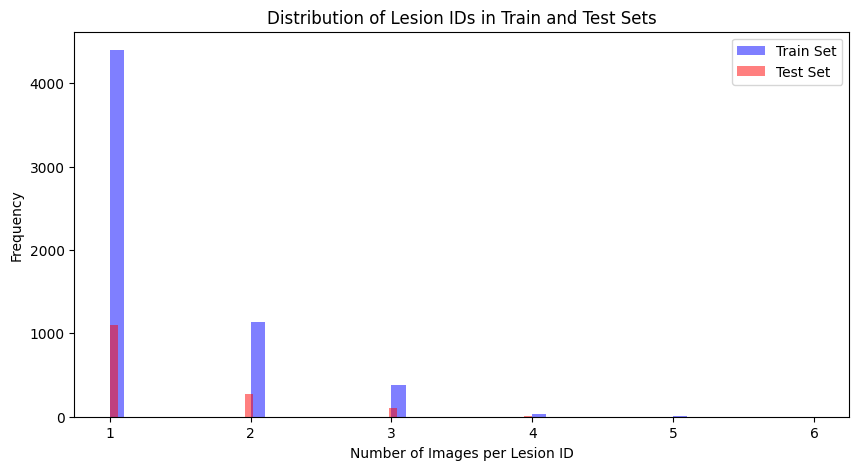

In [21]:
# visually check the distribution of the lesion_id

train_lesion_counts = train_df['lesion_id'].value_counts()
test_lesion_counts = test_df['lesion_id'].value_counts()

plt.figure(figsize=(10, 5))

# Plot distribution of lesion_id counts in train and test
plt.hist(train_lesion_counts, bins=50, alpha=0.5, label="Train Set", color='b')
plt.hist(test_lesion_counts, bins=50, alpha=0.5, label="Test Set", color='r')

plt.xlabel("Number of Images per Lesion ID")
plt.ylabel("Frequency")
plt.title("Distribution of Lesion IDs in Train and Test Sets")
plt.legend(loc="upper right")
plt.show()


In [22]:
# Remove the lesion_id from train_df
train_df = train_df.drop(['lesion_id', 'localization'], axis='columns')

train_df.head()

,image_id,dx_label
2,ISIC_0026769,2
3,ISIC_0025661,2
4,ISIC_0031633,2
5,ISIC_0027850,2
6,ISIC_0029176,2


In [23]:
# Remove the lesion_id from test_df
test_df = test_df.drop(['lesion_id', 'localization'], axis='columns')

test_df.head()

,image_id,dx_label
0,ISIC_0027419,2
1,ISIC_0025030,2
15,ISIC_0031326,2
25,ISIC_0027828,2
26,ISIC_0029291,2


### Pytorch 


In [24]:
# Import for Pytorch
import torch
from torch import nn, optim
from torchvision import datasets, models
from torchvision.transforms import v2 as T
from torch.utils.data import DataLoader, Dataset
from PIL import Image

print(torch.__version__)

# check if GPU is available
torch.cuda.is_available()

2.4.0


True

In [25]:
# Define Transformation using v2
transform = T.Compose([
    T.Resize((224,224)),  # Resize image to 224x224
    T.ToImage(),  # Convert image to tensor
    T.ToDtype(torch.float32, scale=True),  # Convert to dtype float32 and scale to [0, 1]
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet stats
])

In [26]:
# Custom Dataset
class SkinLesionDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image_id = self.df.iloc[idx, 0]
        dx_label = self.df.iloc[idx, 1]

        img_path = f"/kaggle/working/HAM10000_images/{image_id}.jpg"

        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)

        return img, dx_label
        

In [27]:
# make the data set 
training_data = SkinLesionDataset(
    df = train_df,
    transform = transform
)

test_data = SkinLesionDataset(
    df = test_df,
    transform = transform
)

In [28]:
# load the dataset (batch _size 32 for GPU P100)
train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

In [29]:
def train_model(model, train_dataloader, device, number_of_epoch):
    # Define loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    # Train the model (simple training loop)
    model.train()
    for epoch in range(number_of_epoch):  # Use more epochs for real training
        for images, labels in train_dataloader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    return model

In [30]:
def evaluate_model(model, test_datloader, device):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()

    accuracy = correct / total
    print(f"Accuracy for {model}: {accuracy:.4f}")
    return accuracy

In [31]:
# test models
def test_model(model_name, num_classes, train_dataloader, test_dataloader):
    print(f"Testing {model_name}...")

    # Load the model
    if model_name == 'resnet50':
        model = models.resnet50(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif model_name == 'efficientnet_b0':
        model = models.efficientnet_b0(pretrained=True)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    elif model_name == 'vgg16':
        model = models.vgg16(pretrained=True)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    else:
        raise ValueError(f"Model {model_name} is not supported.")

    # Move model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    model = train_model(model, train_dataloader=train_dataloader, device=device, number_of_epoch=2)

    # Evaluate the model
    accuracy = evaluate_model(model, test_dataloader=test_dataloader, device=device)
    return accuracy

In [32]:
model_names = ['resnet50', 'efficientnet_b0']
results = {}

for model_name in model_names:
    results[model_name] = test_model(model_name, num_classes=7, train_dataloader=train_dataloader, test_dataloader=test_dataloader)

print("Results:", results)


### Model to train with

EfficientNet: EfficientNet performed better than resnet


In [33]:
# Train the model on Efficientnet_b0
model = models.efficientnet_b0(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 7)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 89.6MB/s]


In [34]:
# Train the model
trained_model = train_model(model, train_dataloader, device, number_of_epoch=20)

# Evaluate the trained model
# accuracy = evaluate_model(trained_model, test_dataloader, device)

# print(accuracy)


In [36]:
torch.save(model.state_dict(), "/kaggle/working/efficientnet_b0_skin_cancer.pth")
